In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import PIL.Image as Image


In [31]:
FILEFOLDER = './LogFiles'
FILENAME = 'test_1.txt'

filepath = f'{FILEFOLDER}/{FILENAME}'
history = {}

with open(filepath, 'r') as f:
    lines = f.readlines()

for line in lines:
    header = line.split(',')[0][4:]
    if not header in history:
        history[header] = [line[10:-4]]
    else:
        history[header].append(line[10:-4])

history.keys()

dict_keys(['GPGLL', '', 'GPRMC', 'GCROT', 'CCHPR', 'PXTB', 'DYSIG', 'CCAPM'])

In [32]:

gps_data = history['GPRMC']
sig_data = history['DYSIG']

sig_data = np.array([float(i) for i in sig_data])


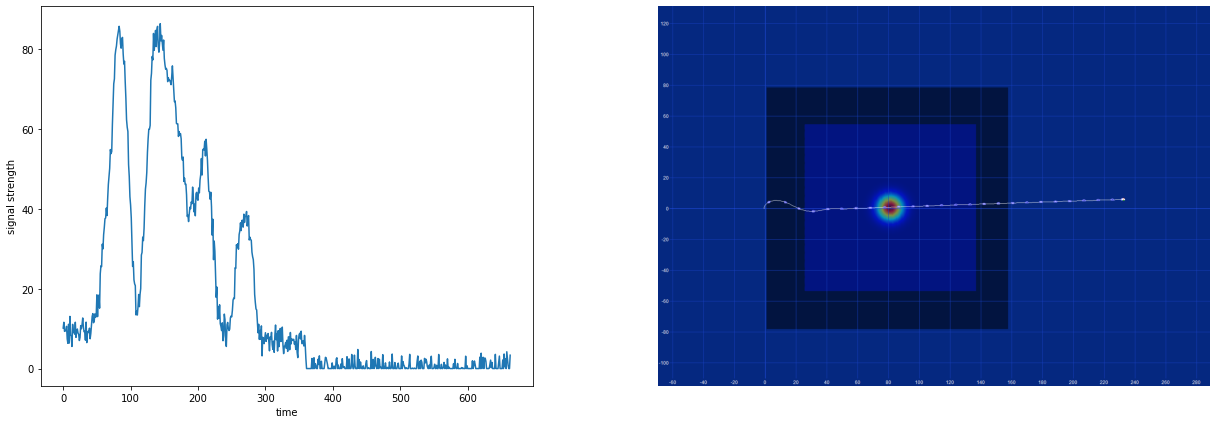

In [33]:
f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 2]})
f.set_size_inches(20, 6)

a0.plot(sig_data)
a0.set_ylabel('signal strength')
a0.set_xlabel('time')

image = np.asarray(Image.open('LogImages/horizontal.png'))
a1.imshow(image)
a1.axis('off')

f.tight_layout()

mean: 8.527153284671533, std: 10.515235311111047


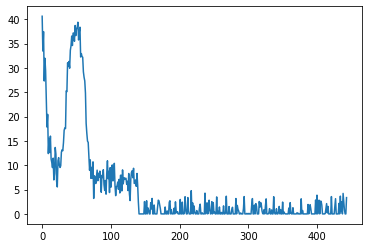

In [34]:
out_of_image_data = sig_data[220:]
# get rid of 0s
non_zero_data = out_of_image_data[out_of_image_data != 0]
plt.plot(out_of_image_data)

mean = np.mean(non_zero_data)
std = np.std(non_zero_data)

print(f'mean: {mean}, std: {std}')

# From horizontal:
# mean: 1.3588135593220338, std: 1.0002797655194622

# From vertical.txt:
# mean: 1.6218103448275865, std: 1.2706613802824342

# From test_1.txt:
# mean: 1.6185074626865672, std: 1.1528637331695977


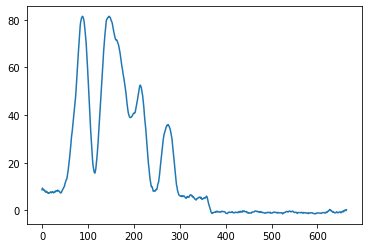

In [36]:
# Sliding window average

stack = []
max_stack_size = 10
smooth_curve = []
for datapoint in sig_data:
    stack.append(datapoint)
    if len(stack) > max_stack_size:
        stack = stack[1:]
    smooth_curve.append(np.mean(stack) - 1.5) # subtract mean value of noise

plt.plot(smooth_curve)

In [112]:
print(mean)
print(std)

1.6185074626865672
1.1528637331695977
